In [1]:
## Introduction

# Sentiment Analysis is a Natural Language Processing (NLP) technique used to identify and classify emotions expressed in textual data.
# It helps determine whether a piece of text conveys a positive, negative, or neutral sentiment.
# This technique is widely used in analyzing reviews, social media posts, and customer feedback.

In [2]:
## About Task

# In this task, sentiment analysis is performed on textual data using machine learning techniques.
# The objective is to preprocess text, extract meaningful features, and train models to predict sentiment accurately.
# The notebook demonstrates data preprocessing, model implementation, evaluation, and insights.

In [3]:
# Import all required libraries for data handling, visualization, text preprocessing, machine learning models, and evaluation metrics.

# Data handling libraries
import pandas as pd
import numpy as np

# Visualiztion libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression library
import re

# String operations library
import string

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Natural Language Processing (NLP) preprocessing tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Sanket
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sanket
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Load the sentiment analysis IMDB dataset
df = pd.read_csv("IMDB Dataset.csv")

In [5]:
# Display first few rows
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Display last few rows
df.tail(5)

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
# Display basic information about the dataset including column names, data types, and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
# Check the distribution of sentiment labels to understand class balance in the dataset.
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
# Convert categorical sentiment labels into numerical values, so that machine learning models can process them.
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [10]:
# Again displaying first few rows to check whether sentiment labels convert into numeric values
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
# Define a function to clean textual data 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Converting lowercase, removing HTML tags, punctuation, stopwords, and applying lemmatization.
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
# Apply the text cleaning function to all reviews.
df['cleaned_review'] = df['review'].apply(clean_text)

# Creating a new column containing cleaned text.
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [13]:
# Convert cleaned text into numerical features using TF-IDF, which captures the importance of words across documents.
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [14]:
# Split the dataset into training and testing sets to evaluate model performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train a Logistic Regression model to classify sentiment based on textual features.
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train);

In [16]:
# Make predictions
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_pred_log)

0.8849

In [17]:
# Detailed classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



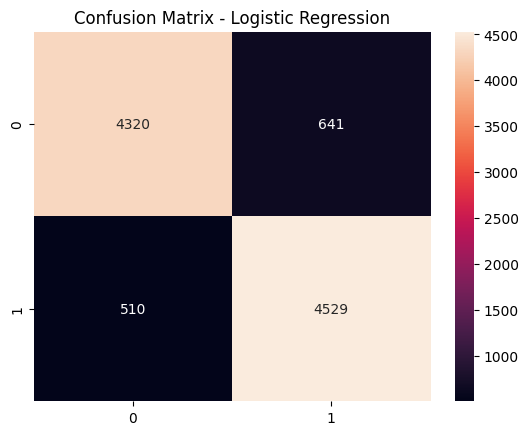

In [18]:
# Visualize the confusion matrix to understand correct and incorrect sentiment predictions.
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [19]:
# Train a Naive Bayes classifier as an additional model to compare performance with Logistic Regression.
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train);

In [20]:
# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_pred_nb)

0.849

In [21]:
# Compare the accuracy of different models to identify the best-performing sentiment classifier.
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_nb)
    ]
})

comparison

,Model,Accuracy
0,Logistic Regression,0.8849
1,Naive Bayes,0.8490


In [22]:
# Create a function to predict sentiment for custom user input using the trained Logistic Regression model.
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction = log_model.predict(vectorized)
    return "Positive" if prediction[0] == 1 else "Negative"

In [23]:
# Testing the trained sentiment model using custom real-world text inputs
predict_sentiment("This movie was absolutely amazing and inspiring")

'Positive'

In [24]:
# Additional real-world sentiment prediction examples
predict_sentiment("The product quality was very poor and totally disappointing")

'Negative'

In [25]:
predict_sentiment("I enjoyed the movie, the story and acting were good")

'Positive'

In [26]:
predict_sentiment("Worst experience ever, I will never recommend this")

'Negative'

In [27]:
predict_sentiment("The delivery was fast and the packaging was excellent")

'Positive'

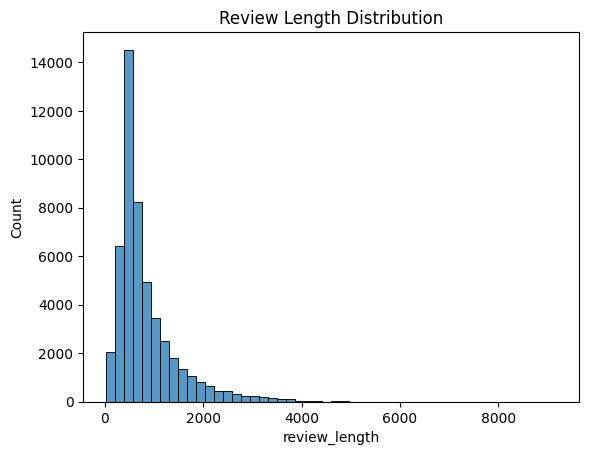

In [28]:
# Analyze the distribution of review lengths to gain additional insights into the textual data.
df['review_length'] = df['cleaned_review'].apply(len)

sns.histplot(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.show()

In [29]:
### Insights:

# - Logistic Regression achieved high accuracy in predicting sentiment.
# - TF-IDF helped convert text into meaningful numerical features.
# - Clean text preprocessing significantly improved performance.
# - Naive Bayes also performed well but slightly lower than Logistic Regression.

In [ ]:
### Conclusion:

# This task demonstrates how NLP techniques can be applied to real-world textual data to automatically classify sentiments. 
# Such models are widely used in product reviews, social media analysis, customer feedback systems, and opinion mining platforms.